In [1]:
# 0，task1、task2 and task3:
import pandas as pd
import numpy as np
import seaborn
from sklearn.preprocessing import Imputer
from sklearn.model_selection  import train_test_split


data = pd.read_csv('../DataSets/001data.csv', encoding='gbk')

columns_dropna = ['bank_card_no', 'reg_preference_for_trad', 'id_name','first_transaction_time','trade_no',
                 'latest_query_time','loans_latest_time']  # 对于这些列实行删除NA样本的操作
temp_columns = list(data.columns.values)
columns_imputer = []                                       # 对于剩余的列实行填充0值的操作
for i in range(len(temp_columns)):
    if temp_columns[i] not in columns_dropna:
        columns_imputer.append(temp_columns[i])
print(len(columns_imputer), len(columns_dropna))

print(data.shape)
data.dropna(axis=0, how='any', subset=columns_dropna, inplace=True)         # 删除缺省值样本
data = data.replace(np.NaN, 0)                                              # 缺省值填充0

column_headers = list(data.columns.values)
print(column_headers.index('status'), len(column_headers))


# 删掉id数据：
columns_drop = ['bank_card_no','source','id_name','custid','student_feature','trade_no']
data.drop(columns_drop, axis=1, inplace=True)
# 日期数据格式化：
data['latest_query_time'] = pd.to_datetime(data['latest_query_time'])
data['loans_latest_time'] = pd.to_datetime(data['loans_latest_time'])
# 将城市特征数值化：
map_dic = {'一线城市':'1','二线城市':'2','三线城市':'3','其他城市':'4','境外':'0'}
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(map_dic)
# 将时间戳数据列丢掉：
data.drop(['latest_query_time','loans_latest_time'], axis=1, inplace=True)
# # 丢掉方差为零的列：
# data.drop(data.columns[data.std()==0], axis=1, inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
#print(data.columns.values)
print(set(data['reg_preference_for_trad']))

# 统计缺失值占比：
data_missing = (data.isnull().sum()/len(data))*100    # np.isnan(data):可将他替换成 data.isnull()
data_missing = data_missing.drop(data_missing[data_missing==0].index).sort_values(ascending=False)
miss_data = pd.DataFrame({'缺失百分比':data_missing})



from sklearn.ensemble import RandomForestClassifier   # 使用随机会森林进行特征选择
x_columns = []  # X的列属性(x变量)
for i in range(len(column_headers)):
    if column_headers[i] not in ['Unnamed: 0','reg_preference_for_trad','latest_query_time','loans_latest_time','status','bank_card_no','source','id_name','unnameid','custid','student_feature','trade_no']:
        x_columns.append(column_headers[i])  
        
X = data[x_columns]  # 获取x变量
Y = data['status']   # 获取y标签(label)

clf = RandomForestClassifier()
clf.fit(X, Y)

importance = clf.feature_importances_
indices = np.argsort(importance)[::-1]
features = X.columns
for f in range(X.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30, features[f], importance[indices[f]])))
    
# 特征工程：
from sklearn.feature_selection import VarianceThreshold
X_fsvar = VarianceThreshold().fit_transform(X) # 过滤掉方差为零的列，并实例化，不填写参数默认方差为0
nan_rate = pd.DataFrame((data.shape[0]-data.count())/data.shape[0])  #查看缺失值比例
nan_rate

# 特征工程：互信息法,它返回每个特征与目标之间的互信息量的估计，这个估计在[0,1]之间取值，0表示独立，1表示两个变量完全相关
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(X,Y)
print((result == 0).sum())
delete = []
for i in range(79):
    if result[i] == 0:
        delete.append(i)
X_ = X.drop(X.iloc[:,delete],axis=1)
X_.shape

# SMOTE:样本不均衡
print(Y[Y==1].count()/Y[Y==0].count())

import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=420)
X,Y = sm.fit_sample(X_,Y)

n_sample_ = X.shape[0]

pd.Series(Y).value_counts()

n_1_sample = pd.Series(Y).value_counts()[1]
n_0_sample = pd.Series(Y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=2018)

83 7
(4754, 90)
44 90
{'3', '4', '2', '1', '0'}


/home/jesse/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 1) low_volume_percent             0.059935
 2) middle_volume_percent          0.044443
 3) take_amount_in_later_12_month_highest 0.038351
 4) trans_amount_increase_rate_lately 0.034306
 5) trans_activity_month           0.026665
 6) trans_activity_day             0.022686
 7) transd_mcc                     0.020600
 8) trans_days_interval_filter     0.019930
 9) trans_days_interval            0.019037
10) regional_mobility              0.018668
11) repayment_capability           0.018222
12) is_high_user                   0.015877
13) number_of_trans_from_2011      0.015803
14) first_transaction_time         0.015798
15) historical_trans_amount        0.015613
16) historical_trans_day           0.015245
17) rank_trad_1_month              0.015067
18) trans_amount_3_month           0.015059
19) avg_consume_less_12_valid_month 0.014770
20) abs                            0.014750
21) top_trans_count_last_1_month   0.014672
22) avg_price_last_12_month        0.014587
23) avg_price_top_las

In [2]:
# 保存特征工程后的数据，即模型持久化：
data.to_csv('../OutPut/001data_afterFE.csv', index = None)

In [3]:
# 1，绘制ROC曲线：
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics.ranking import roc_curve
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,6
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,f1_score,\
            recall_score,precision_recall_curve,roc_auc_score,roc_curve
from sklearn.model_selection import learning_curve,train_test_split,cross_val_score

DATA_FILE = '../OutPut/001data_afterFE.csv' 

pd.set_option('display.max_columns',None)

def load_data():
    """
    加载数据和分割数据
    return
     X_train,
     X_test,
     y_train,
     y_test
    """
    df = pd.read_csv(DATA_FILE, encoding='gbk')
    print(df.shape)
    X = df.drop('status',axis=1)
    y = df['status']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2018)
    return X_train,X_test,y_train,y_test
    
def model_predict(X_train,X_test,y_train,y_test):
    """
    采用各类模型进行预测
    """
    classifiers = {
        'LogisticRegression' : LogisticRegression(C=0.001),
        'Support Vector Machine Classifier' : SVC(),
        'Decision Tree Classifier' : DecisionTreeClassifier(),
        'Random Forest Classifier' : RandomForestClassifier(),
        'Xgboost Classifier' : XGBClassifier()
        }
    
    model_metrics = []
    
    for model_name,model in classifiers.items():
        model.fit(X_train,y_train)
#         cross_val_score_local = cross_val_score(model,X_train,y_train,cv=5)
        print('*' * 10,'模型名称:',model_name,'*' * 10)
#         print(',交叉验证得分:',round(cross_val_score_local.mean() * 100,2),'%')

        model_sc = {}
        
        """这是训练集上的评价"""
        y_pred_t = model.predict(X_train)
        accuracy_t = accuracy_score(y_train,y_pred_t)
        precision_t = precision_score(y_train,y_pred_t)
        f1_t = f1_score(y_train,y_pred_t)
        recall_t = recall_score(y_train,y_pred_t)
        auc_t = roc_auc_score(y_train,y_pred_t)        
        
        model_sc['model_name'] = model_name
        model_sc['model_data_sort'] = 'Train Data'
        model_sc['accuracy'] = accuracy_t
        model_sc['precision'] = precision_t
        model_sc['f1'] = f1_t
        model_sc['recall'] = recall_t
        model_sc['auc'] = auc_t
        model_metrics.append(model_sc)
        
        print('\n训练集：Accuracy Score:{:.2f}'.format(accuracy_t))
        print('\n训练集：Precision Score:{:.2f}'.format(precision_t))
        print('\n训练集：F1 Score:{:.2f}'.format(f1_t))
        print('\n训练集：Recall Score:{:.2f}'.format(recall_t))
        print('\n训练集：Auc Roc Score:{:.2f}'.format(auc_t))

        """这是才测试集上的评价"""
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        f1 = f1_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        auc = roc_auc_score(y_test,y_pred)   
         
        model_sc = {}
        model_sc['model_name'] = model_name
        model_sc['model_data_sort'] = 'Test Data'
        model_sc['accuracy'] = accuracy
        model_sc['precision'] = precision
        model_sc['f1'] = f1
        model_sc['recall'] = recall
        model_sc['auc'] = auc
        model_metrics.append(model_sc)            
        
        print('\n测试集：Accuracy Score:{:.2f}'.format(accuracy))
        print('\n测试集：Precision Score:{:.2f}'.format(precision))
        print('\n测试集：F1 Score:{:.2f}'.format(f1))
        print('\n测试集：Recall Score:{:.2f}'.format(recall))
        print('\n测试集：Auc Roc Score:{:.2f}'.format(auc))
        # 绘制ROC曲线
        fpr,tpr,threshold = roc_curve(y_test,y_pred)
        fpr_t,tpr_t,threshold_t = roc_curve(y_train,y_pred_t)
        plt.figure(figsize=(10,8))
        plt.title('{} 模型 ROC曲线'.format(model_name),fontsize=18)
        plt.plot(fpr_t,tpr_t, label='{} 模型 在训练数据 得分:{:.4f}'.format(model_name,auc_t))
        plt.plot(fpr,tpr,label='{} 模型 在测试数据 得分:{:.4f}'.format(model_name,auc))
        plt.plot([0,1],[0,1],'k--')
        plt.axis([-0.01,1,0,1])
        plt.xlabel('False Positive Rate', fontsize=16)
        plt.ylabel('True Positive Rate', fontsize=16)
        plt.legend(loc='best')
        plt.show()
        
    return model_metrics
        
        
def main():
    # 1.1 加载切分后的数据集
    X_train,X_test,y_train,y_test = load_data()
    
    # 多种模型预测
    model_metrics = model_predict(X_train,X_test,y_train,y_test)
    model_metrics_df = pd.DataFrame(model_metrics)
    model_metrics_df.set_index(['model_name','model_data_sort'], inplace=True)
    
    print(model_metrics_df)

# if __name__ == '__main__':
#     main()

(4429, 81)
********** 模型名称: LogisticRegression **********

训练集：Accuracy Score:0.75

训练集：Precision Score:0.00

训练集：F1 Score:0.00

训练集：Recall Score:0.00

训练集：Auc Roc Score:0.50

测试集：Accuracy Score:0.74

测试集：Precision Score:0.00

测试集：F1 Score:0.00

测试集：Recall Score:0.00

测试集：Auc Roc Score:0.50


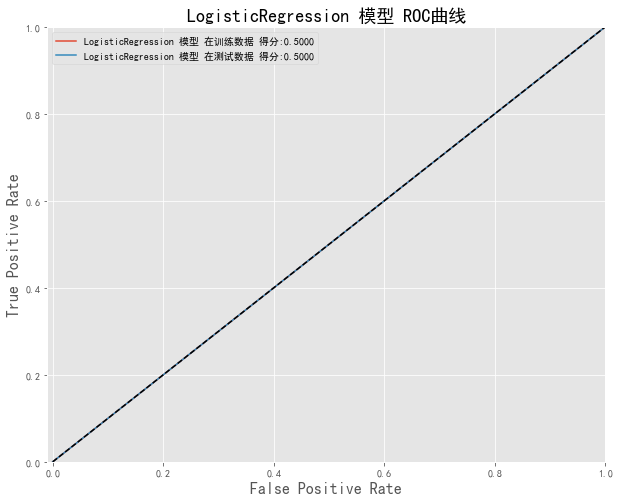

********** 模型名称: Support Vector Machine Classifier **********

训练集：Accuracy Score:1.00

训练集：Precision Score:1.00

训练集：F1 Score:1.00

训练集：Recall Score:1.00

训练集：Auc Roc Score:1.00

测试集：Accuracy Score:0.74

测试集：Precision Score:0.00

测试集：F1 Score:0.00

测试集：Recall Score:0.00

测试集：Auc Roc Score:0.50


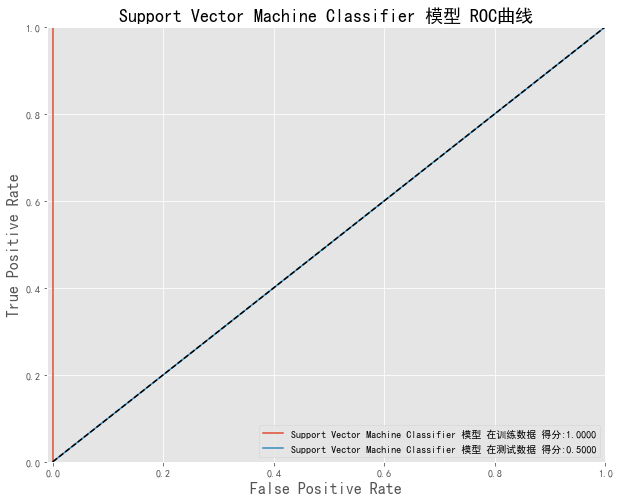

********** 模型名称: Decision Tree Classifier **********

训练集：Accuracy Score:1.00

训练集：Precision Score:1.00

训练集：F1 Score:1.00

训练集：Recall Score:1.00

训练集：Auc Roc Score:1.00

测试集：Accuracy Score:0.69

测试集：Precision Score:0.41

测试集：F1 Score:0.43

测试集：Recall Score:0.44

测试集：Auc Roc Score:0.61


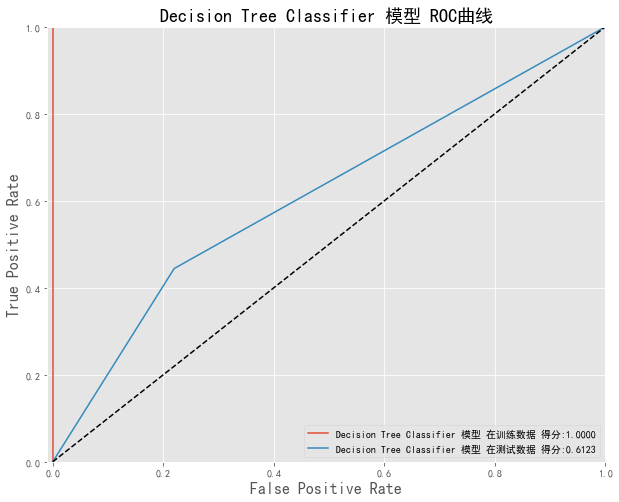

********** 模型名称: Random Forest Classifier **********

训练集：Accuracy Score:0.98

训练集：Precision Score:0.99

训练集：F1 Score:0.96

训练集：Recall Score:0.92

训练集：Auc Roc Score:0.96

测试集：Accuracy Score:0.77

测试集：Precision Score:0.60

测试集：F1 Score:0.38

测试集：Recall Score:0.28

测试集：Auc Roc Score:0.61


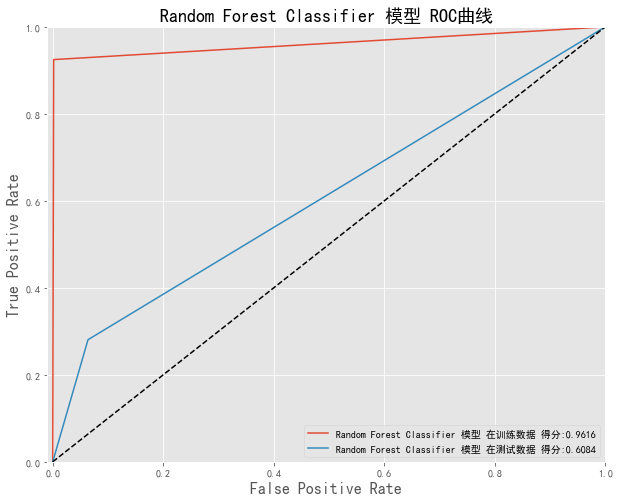

********** 模型名称: Xgboost Classifier **********

训练集：Accuracy Score:0.86

训练集：Precision Score:0.87

训练集：F1 Score:0.64

训练集：Recall Score:0.51

训练集：Auc Roc Score:0.74

测试集：Accuracy Score:0.79

测试集：Precision Score:0.67

测试集：F1 Score:0.48

测试集：Recall Score:0.37

测试集：Auc Roc Score:0.66


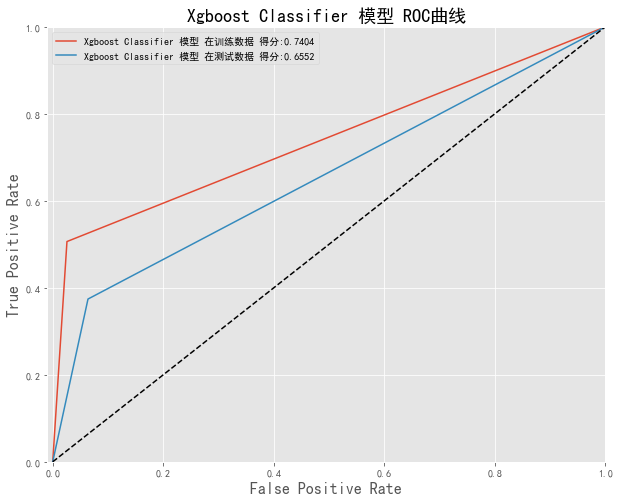

                                                   accuracy       auc  \
model_name                        model_data_sort                       
LogisticRegression                Train Data       0.750968  0.500000   
                                  Test Data        0.742664  0.500000   
Support Vector Machine Classifier Train Data       1.000000  1.000000   
                                  Test Data        0.742664  0.500000   
Decision Tree Classifier          Train Data       1.000000  1.000000   
                                  Test Data        0.693755  0.612293   
Random Forest Classifier          Train Data       0.980000  0.961576   
                                  Test Data        0.767494  0.608436   
Xgboost Classifier                Train Data       0.857742  0.740352   
                                  Test Data        0.791573  0.655220   

                                                         f1  precision  \
model_name                        model_data_sort

In [4]:
main()